## Procesamiento de Audio con diferentes librerias de Python

**Alumno:** Mariel López Armenta  
**Materia:** Ciencia de Datos para Sensores Inteligentes

### Introducción
En este ejercicio se probarón 5 librerías diferentes: 
1. *Librosa*
2. *Soundfile*
3. *SciPy*
4. *Pydub*
5. *Transformers*
   
La idea es aplicar lo que vimos en clase sobre muestreo y ver cómo se conectan estas herramientas con los modelos de IA que en la lectura de ASR (como los Transformers y el Conformer). Use un archivo de audio particular para ver qué pasaba al aplicarle filtros y transformaciones.

### 1. Carga y reproducción con Librosa
Para empezar, se usó *Librosa* para cargar el audio. Lo que me gusta de esta librería es que es muy fácil de usar para proyectos de ciencia de datos y ya te entrega el audio listo para trabajar. También se agrega `IPython.display` para poner el reproductor y escuchar el archivo directamente aquí en el notebook.

In [9]:
import librosa
import IPython.display as ipd

import warnings
warnings.filterwarnings('ignore')

archivo = 'miaw_miaw_song.wav'

# Librosa para la carga y previsualización
y, sr = librosa.load(archivo, sr=None)

print("Previsualizacion del audio:\n")


# Generacion del reproductor
ipd.display(ipd.Audio(y, rate=sr))

Previsualizacion del audio:



### 2. Análisis técnico de metadatos con SoundFile
Se utilizó la librería SoundFile para realizar una inspección profunda del archivo. A diferencia de otras herramientas, esta permite acceder directamente a la cabecera (i.e. header) del audio para verificar parámetros críticos como el subtipo de cuantización (e.g. PCM de 16 o 24 bits) y el formato de codificación original. Esto es importante en el sensado inteligente para asegurar la integridad de los datos antes de cualquier procesamiento.

In [2]:
import soundfile as sf

# Soundfile para los metadatos del audio
info = sf.info(archivo)

print("Metadatos:\n")
print(f"Formato: {info.format_info}")
print(f"Subtipo: {info.subtype}")
print(f"Canales: {info.channels}")
print(f"Duración: {info.duration:.2f} segundos")
print(f"Samplerate: {info.samplerate} Hz\n")

Metadatos:

Formato: WAV (Microsoft)
Subtipo: PCM_16
Canales: 2
Duración: 24.28 segundos
Samplerate: 48000 Hz



### 2. Visualización en el Dominio del Tiempo
Usando Matplotlib, se graficó la forma de onda. Esto permite ver la amplitud de la señal a lo largo del tiempo y detectar visualmente los silencios o picos de energía.

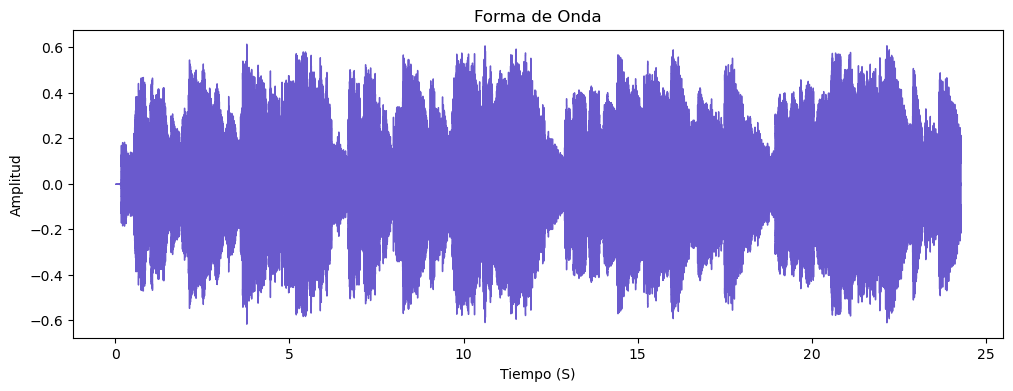

In [3]:
import matplotlib.pyplot as plt

# Matplotlib para graficar la Forma de Onda
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y, sr=sr, color='slateblue')
plt.title("Forma de Onda")
plt.xlabel("Tiempo (S)")
plt.ylabel("Amplitud")
plt.show()

### 3. Análisis de Frecuencia (Espectrograma de Mel)
Siguiendo lo visto en clase y lo que leímos en el artículo sobre Conformers, aquí se convirtió el audio en una representación visual de frecuencias. Esta imagen es fundamental porque es lo que los modelos de Deep Learning modernos analizan para reconocer patrones de voz.

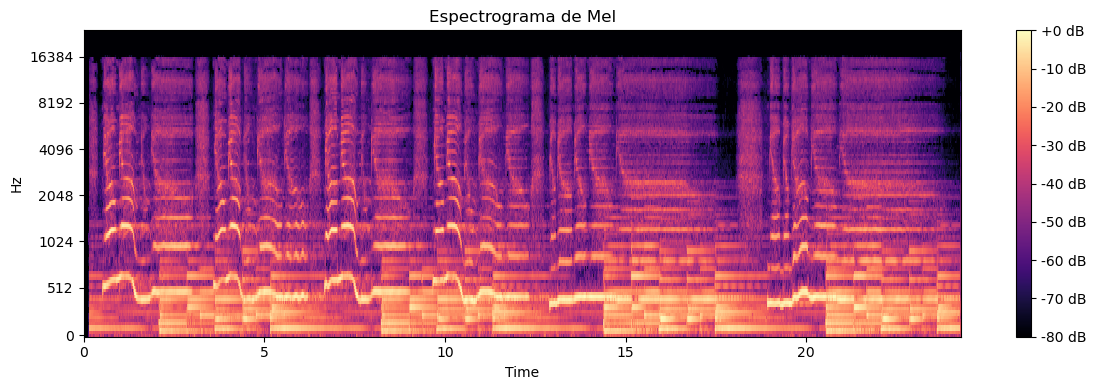

In [4]:
import numpy as np

# Espectograma de Mel
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
S_dB = librosa.power_to_db(S, ref=np.max)

# Grafica del Espectrograma
plt.figure(figsize=(12, 4))
librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title("Espectrograma de Mel")
plt.tight_layout()
plt.show()

### 4. Filtrado de Señales con SciPy
Aquí se aplicó un filtro de Pasa Bajas para eliminar las frecuencias agudas. Esto sirve para quitar ruidos de altas frecuencias y dejar solo la base de la señal.

In [5]:
from scipy.signal import butter, sosfilt
import IPython.display as ipd

# Configuracion de filtro 
frecuencia_corte = 1000 
sos = butter(10, frecuencia_corte, 'low', fs=sr, output='sos')
audio_filtrado = sosfilt(sos, y)

print(f"Filtro de Pasa bajas a {frecuencia_corte}Hz")
ipd.Audio(audio_filtrado, rate=sr)

Filtro de Pasa bajas a 1000Hz


Aquí podemos obsevar de manera visual la comparacion del audio original y el audio filtrado utilizando nuevamente el Espectograma de Mel:

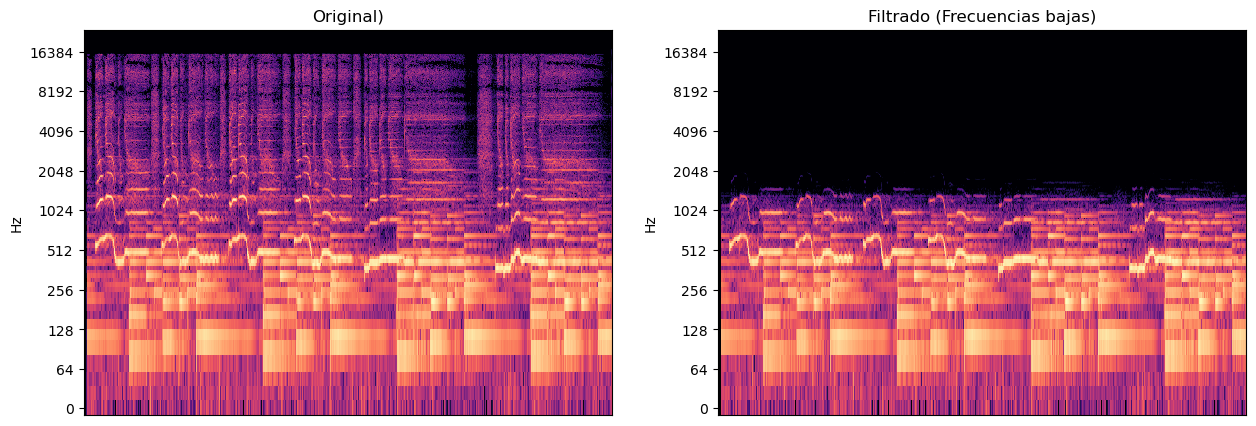

In [6]:
# Comparacion del Audio Original vs Audio Filtrado
plt.figure(figsize=(15, 5))

# Original
plt.subplot(1, 2, 1)
S_orig = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
librosa.display.specshow(S_orig, sr=sr, y_axis='log')

plt.title("Original)")

# Filtrado
plt.subplot(1, 2, 2)
S_filt = librosa.amplitude_to_db(np.abs(librosa.stft(audio_filtrado)), ref=np.max)
librosa.display.specshow(S_filt, sr=sr, y_axis='log')
plt.title("Filtrado (Frecuencias bajas)")

plt.show()

### 5. Edición y Normalización con Pydub
Para que el audio tenga un nivel de volumen constante, se usó Pydub para normalizar la amplitud. Esto evita que la señal llegue muy débil o muy saturada al siguiente proceso. También guardo el archivo final procesado.

In [7]:
from pydub import AudioSegment

audio_pydub = AudioSegment.from_file(archivo)
audio_normalizado = audio_pydub.normalize()

# Guardamos el resultado
audio_normalizado.export("Miawdio_final.wav", format="wav")
print("Audio normalizado y guardado como 'MIAWdio_final.wav'")

Audio normalizado y guardado como 'MIAWdio_final.wav'


C:\Users\Marie\anaconda3\Lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


### 6. Transcripción con IA (Transformers)
Finalmente, se usó la librería Transformers con el modelo Whisper. Este modelo utiliza mecanismos de atención (como los del Conformer) para intentar traducir el sonido a texto. 

*Nota importante:* Como mi audio tiene sonidos "no humanos", fue interesante observar cómo la IA intenta "adivinar" palabras, lo que demuestra la falta de robustez del modelo ante ambientes no controlados o sonidos fuera de su dataset original.

In [8]:
from transformers import pipeline
import librosa

# Carga del audio con librosa (esto porque si no necesitaria ffmpeg si es .wav)
# Whisper necesita que el audio esté exactamente a 16000 Hz
y_16k, sr_16k = librosa.load('miaw_miaw_song.wav', sr=16000)

# Configuramos la IA (Modelo Whisper de OpenAI)
transcriptor = pipeline("automatic-speech-recognition", model="openai/whisper-tiny")

# Le pasamos los datos directamente a la IA
resultado = transcriptor(y_16k)


print("Análisis de IA:\n")

print("Texto transcrito:", resultado["text"])

Device set to use cpu
`return_token_timestamps` is deprecated for WhisperFeatureExtractor and will be removed in Transformers v5. Use `return_attention_mask` instead, as the number of frames can be inferred from it.
Using custom `forced_decoder_ids` from the (generation) config. This is deprecated in favor of the `task` and `language` flags/config options.
Transcription using a multilingual Whisper will default to language detection followed by transcription instead of translation to English. This might be a breaking change for your use case. If you want to instead always translate your audio to English, make sure to pass `language='en'`. See https://github.com/huggingface/transformers/pull/28687 for more details.


Análisis de IA:

Texto transcrito:  Yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum yum 

# Conclusión

Elegí esas 5 librerías porque juntas cubren el ciclo completo de vida de una señal, desde la lectura técnica de metadatos y el análisis de frecuencias, hasta el pre-procesamiento por filtrado y la interpretación final mediante Inteligencia Artificial. Mi objetivo principal fue conectar este ejercicio práctico con la lectura de ASR (Automatic Speech Recognition), ya que el artículo de Ahlawat et al. (2025) resalta que el éxito de modelos modernos como el Conformer depende totalmente de qué tan limpia y bien representada esté la señal de entrada.

Un punto clave fue que inicialmente, apliqué un filtro para eliminar ruidos por debajo de los 100 Hz, pero noté que la diferencia auditiva era prácticamente imperceptible. Recordando lo que el profesor mencionó en clase sobre que el oído humano no percibe las frecuencias de forma lineal, sino logarítmica, comprendí que para notar un cambio real debía hacer un ajuste mucho más drástico. Es por eso que decidí desplazar el corte hacia rangos superiores. Aunque al oído la diferencia en ese rango ya podia distinguirse, decidí incluir estas comparaciones visuales porque más allá de nuestra percepción auditiva sea limitada en ciertos rangos (que con el cambio a 1kHz ya podia escucharse la diferencia), la IA trabaja precisamente con estas imágenes (espectrogramas), procesando la señal como una matriz de datos donde cada cambio de frecuencia es fundamental para la decodificación.

Como "cereza del pastel", quiero mencionar mi proceso con el archivo de audio. Originalmente, mi primera elección fue un audio muy conocido de un gato cantando. Al llegar a la parte de Transformers, pensé en cambiarlo por una voz humana para que la transcripción fuera "correcta". Sin embargo, decidí mantener el audio original para documentar una de las deficiencias que el artículo menciona sobre los modelos End-to-End: la falta de robustez ante datos fuera del dominio del habla.

Es fascinante ver que, aunque existen mil formas de representar un maullido (miau, meow, miaw), el modelo Whisper decidió que "yum" era la interpretación más probable estadísticamente. Esto muestra que, a pesar de los avances en redes neuronales, el modelo todavía intenta forzar los sonidos a patrones del lenguaje humano que conoce.